In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

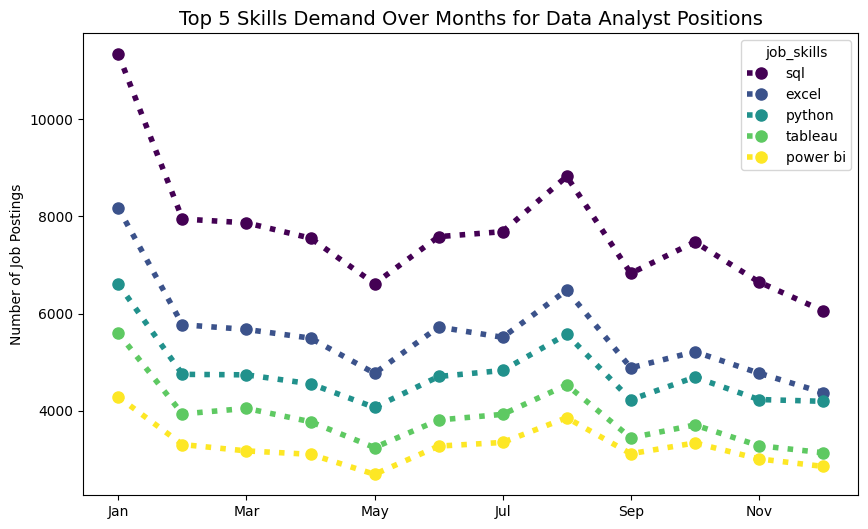

In [19]:
# Create new columns for month number 
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    marker='o', # options: 'o', 's', '^', 'D', '*'
    markersize=8,
    colormap='viridis',
    figsize=(10, 6)
)

plt.title('Top 5 Skills Demand Over Months for Data Analyst Positions', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.show()

In [ ]:
# Tạo 1 bảng groupby để tính toán số lượng kỹ năng và mức lương trung vị của từng skill 
skill_stat = df_DA_exploded.groupby(['job_skills']).agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)
# Lấy 20 kỹ năng có số lượng cao nhất
skill_count = 20
skill_stat = skill_stat.sort_values(by='skill_count', ascending=False).head(skill_count)

C:\Users\cuanl\AppData\Local\Temp\ipykernel_9204\927018279.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (skill_stat['skill_count'][i], skill_stat['median_salary'][i]),


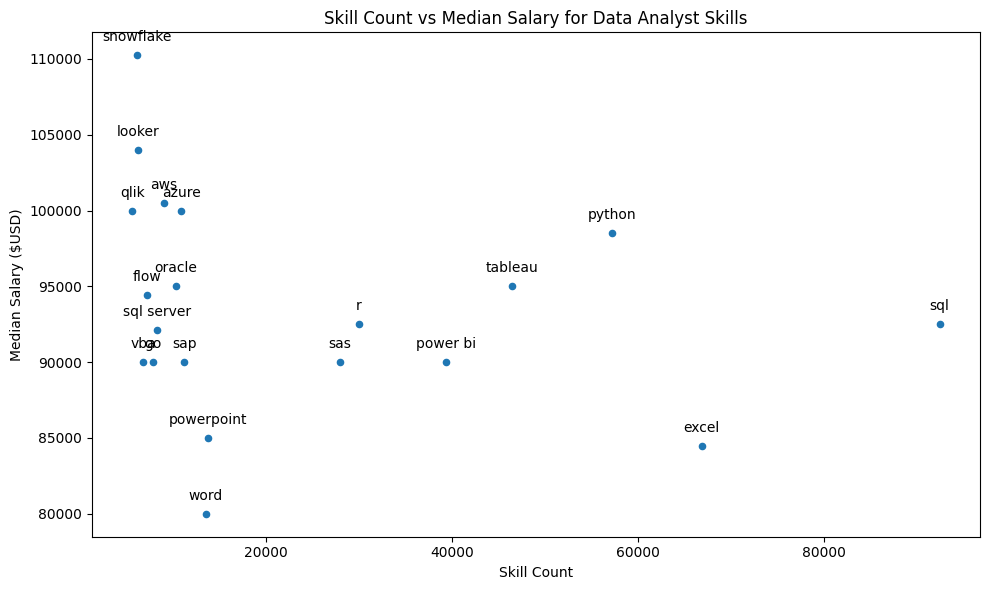

In [ ]:
from adjustText import adjust_text
